# Machine Learning - Train/Test

# Evaluate Your Model

In Machine Learning we create models to predict the outcome of certain events, like in the previous chapter where we predicted the CO2 emission of a car when we knew the weight and engine size.

To measure if the model is good enough, we can use a method called Train/Test.

# What is Train/Test

Train/Test is a method to measure the accuracy of your model.

It is called Train/Test because you split the data set into two sets: a training set and a testing set.

<i>80% for training, and 20% for testing.</i>

You <i>train</i> the model using the training set.

You <i>test</i> the model using the testing set.

<i><b>Train</b></i> the model means create the model.

<i><b>Test</b></i> the model means test the accuracy of the model.


# Start With a Data Set

Start with a data set you want to test.

Our data set illustrates 100 customers in a shop, and their shopping habits.

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
np.random.seed(2)

In [55]:
x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

# Result:

The x axis represents the number of minutes before making a purchase.

The y axis represents the amount of money spent on the purchase.

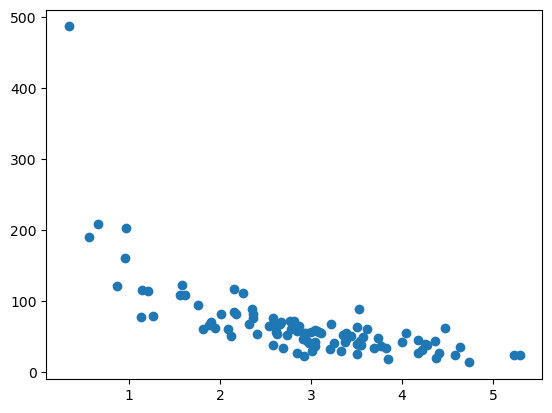

In [56]:
plt.scatter(x, y)
plt.show()

# Split Into Train/Test

The training set should be a random selection of 80% of the original data.

The testing set should be the remaining 20%

In [57]:
xtrain = x[:80]
ytrain = y[:80]

xtest = x[80:]
ytest = y[80:]

Here [:80] defines that this array takes values from index 0 to 80. or from the starting number up to 80

and [80:] defines that this array takes values from 80 to the last value of its parent array.

Since we got 100 values,

[:80] defines 1 to 80
[80:] defines 80 to 100

# Display the Training Set

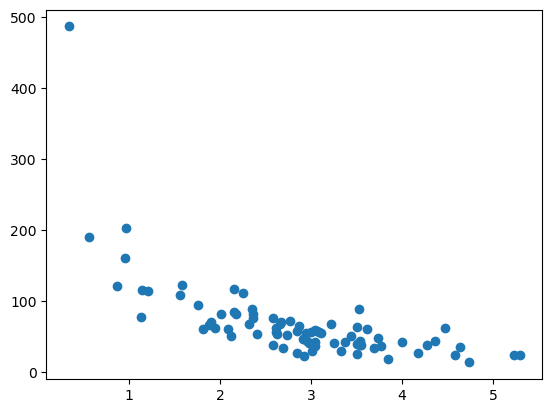

In [58]:
plt.scatter(xtrain, ytrain)
plt.show()

# Display the Testing Set

To make sure the testing set is not completely different, we will take a look at the testing set as well.

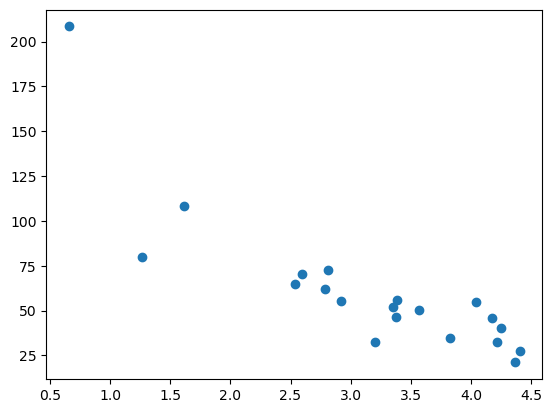

In [59]:
plt.scatter(xtest, ytest)
plt.show()

# Fit the Data Set

What does the data set look like? In my opinion I think the best fit would be a polynomial regression, so let us draw a line of polynomial regression.

To draw a line through the data points, we use the plot() method of the matplotlib module:

<i><b>Draw a polynomial regression line through the data points:</b></i>

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

In [84]:
xtrain = x[:80]
ytrain = y[:80]

xtest = x[80:]
ytest = y[80:]

### Polynomial Regression

In [85]:
mymodel = np.poly1d(np.polyfit(xtrain, ytrain, 3))
myline = np.linspace(0, 6, 100)

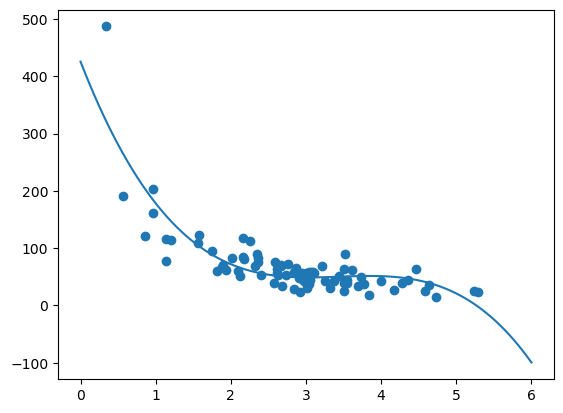

In [86]:
plt.scatter(xtrain, ytrain)
plt.plot(myline, mymodel(myline))
plt.show()

The result can back my suggestion of the data set fitting a polynomial regression, even though it would give us some weird results if we try to predict values outside of the data set. Example: the line indicates that a customer spending 6 minutes in the shop would make a purchase worth 200. That is probably a sign of overfitting.

But what about the R-squared score? The R-squared score is a good indicator of how well my data set is fitting the model.

# R2

Remember R2, also known as R-squared?

It measures the relationship between the x axis and the y axis, and the value ranges from 0 to 1, where 0 means no relationship, and 1 means totally related.

The sklearn module has a method called <b>r2_score()</b> that will help us find this relationship.

In this case we would like to measure the relationship between the minutes a customer stays in the shop and how much money they spend.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
np.random.seed(2)

In [88]:
x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

In [89]:
xtrain = x[:80]
ytrain = y[:80]

xtest = x[80:]
ytest = y[80:]

In [90]:
mymodel = np.poly1d(np.polyfit(xtrain, ytrain, 3)) 
# 3 is the degree for curving the plot

#### R-Squard (r2_score)

In [91]:
r2 = r2_score(ytrain, mymodel(xtrain))

In [92]:
print(r2)

0.735999316871548


The result represents a good relationship

# Bring in the Testing Set

Now we have made a model that is OK, at least when it comes to training data.

Now we want to test the model with the testing data as well, to see if gives us the same result.

In [93]:
r3 = r2_score(ytest, mymodel(xtest))

In [94]:
print(r3)

0.7378128004311392


<b>Note:</b> The result 0.7378 shows that the model fits the testing set as well, and we are confident that we can use the model to predict future values.

# Predict Values

Now that we have established that our model is OK, we can start predicting new values.

# Example

How much money will a buying customer spend, if she or he stays in the shop for 5 minutes?

In [95]:
print(mymodel(5))

20.931871588310855


The example predicted the customer to spend 20.93 dollars, as seems to correspond to the diagram:

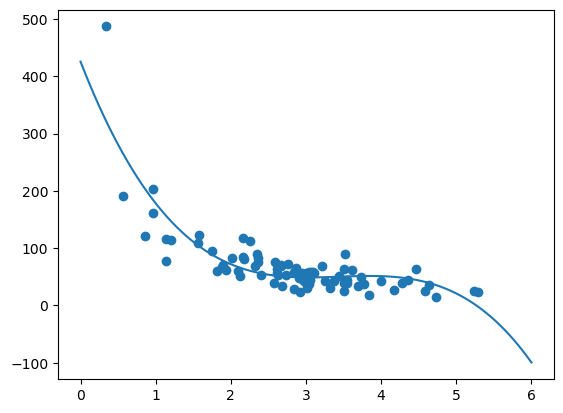

In [96]:
plt.scatter(xtrain, ytrain)
plt.plot(myline, mymodel(myline))
plt.show()